<a href="https://colab.research.google.com/github/Artem-Nevolin/courses/blob/main/analiz_stoimosty_nedvizimosty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!wget https://www.dropbox.com/s/0x28wus8qgrgirh/house_price.csv

--2022-05-08 14:20:53--  https://www.dropbox.com/s/0x28wus8qgrgirh/house_price.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0x28wus8qgrgirh/house_price.csv [following]
--2022-05-08 14:20:54--  https://www.dropbox.com/s/raw/0x28wus8qgrgirh/house_price.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb622056eb0f99dbed205920093.dl.dropboxusercontent.com/cd/0/inline/Bk6yUm3Pqomaemnfzz1qNPHQgUQw1c8Bg349MSaMnftRH1Rh52LJnjTtFA0w7ybxPIB61T5z3fN_r_NGcRJYjWpTffurthkiybpZsgWHojie2tDbAlHp6mUwGxxPcWbYJRu37XY2qBXcjdy6HNt8WDorzZwvsrNDMwv8BOMv80Q44w/file# [following]
--2022-05-08 14:20:54--  https://ucb622056eb0f99dbed205920093.dl.dropboxusercontent.com/cd/0/inline/Bk6yUm3Pqomaemnfzz1qNPHQgUQw1c8Bg349MSaMnftRH1Rh52LJnjTtFA0

In [5]:
  data = pd.read_csv('house_price.csv', index_col=0, decimal=',')

In [6]:
data.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,260000,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,734500,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,325000,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,1990000,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,315000,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [7]:
data.shape

(21613, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 15128
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Целевая.Цена         21613 non-null  int64  
 1   Спальни              21613 non-null  int64  
 2   Ванные               21613 non-null  float64
 3   Жилая площадь        21613 non-null  int64  
 4   Общая площадь        21613 non-null  int64  
 5   Количество этажей    21613 non-null  float64
 6   Вид на воду          21613 non-null  int64  
 7   Просмотрены ранее    21613 non-null  int64  
 8   Состояние            21613 non-null  int64  
 9   Оценка риелтора      21613 non-null  int64  
 10  Площадь без подвала  21613 non-null  int64  
 11  Площадь подвала      21613 non-null  int64  
 12  Год постройки        21613 non-null  int64  
 13  Год реновации        21613 non-null  int64  
 14  Широта               21613 non-null  float64
 15  Долгота              21613 non-null 

In [9]:
 target_name = 'Целевая.Цена'

In [10]:
y = data[target_name]
y

0         260000
1         734500
2         325000
3        1990000
4         315000
          ...   
15124     930000
15125     400000
15126    1580000
15127     339900
15128     430000
Name: Целевая.Цена, Length: 21613, dtype: int64

In [11]:
X = data.drop(target_name, axis=1)

In [12]:
X.head()

,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
0,3,1.00,1300,10139,1.0,0,0,3,7,1300,0,1962,2007,47.3427,-122.087
1,4,2.75,3280,6845,2.0,0,0,3,10,3280,0,2003,0,47.7042,-122.107
2,1,1.00,1220,12426,1.0,0,4,4,6,1220,0,1946,0,47.4047,-122.331
3,3,2.50,2880,13500,1.0,0,4,5,8,1520,1360,1950,0,47.6281,-122.216
4,3,2.00,1300,3731,1.0,0,0,3,7,900,400,1993,0,47.5374,-122.270


In [13]:
X.shape

(21613, 15)

In [14]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.shape

(15129, 15)

In [19]:
from sklearn import linear_model

In [22]:
liner_regression_model = linear_model.LinearRegression()
liner_regression_model


LinearRegression()

In [23]:
liner_regression_model.fit(X_train, y_train)

LinearRegression()

In [24]:
test_prediction = liner_regression_model.predict(X_test)
test_prediction

array([627818.52058236, 495289.49150906, 221685.52662731, ...,
       628575.44407558, 540213.08167742, 377874.52256492])

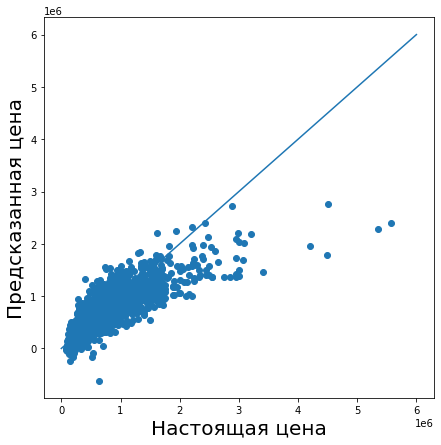

In [26]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_prediction)
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [27]:
coeff_df = pd.DataFrame(liner_regression_model.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Спальни,-38707.104102
Ванные,43234.100193
Жилая площадь,118.370063
Общая площадь,-0.117990
Количество этажей,-3571.423363
Вид на воду,601705.366343
Просмотрены ранее,51937.305224
Состояние,31106.930832
Оценка риелтора,100005.342398
Площадь без подвала,78.683994


In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': test_prediction})
df1 = df.head(25)
df

,Actual,Predicted
735,682000,627818.520582
2830,855000,495289.491509
4106,199500,221685.526627
9734,752000,775893.293276
13480,440000,508726.433833
...,...,...
6122,315000,180141.688201
7909,397500,362695.444332
415,555000,628575.444076
85,428750,540213.081677


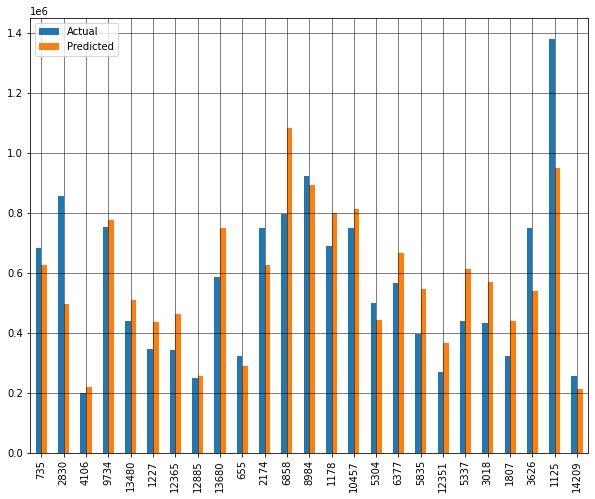

In [34]:
df1.plot(kind='bar', figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.show()
